In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
pip install onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 52.1 MB/s eta 0:00:00


In [ ]:
pip install opencv-python

In [ ]:
pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 98.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.7 MB/s eta 0:00:00



image 1/1 /content/5C0.jpg: 480x640 1 5C, 645.7ms
Speed: 16.5ms preprocess, 645.7ms inference, 36.8ms postprocess per image at shape (1, 3, 480, 640)
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/content/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 57, 8400) (18.3 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.59'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 3.7s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.18.0 opset 19...
ONNX: slimming with onnxslim 0.1.61...
ONNX: export success ✅ 11.0s, saved as '/content/best.onnx' (36.1 MB)

Export complete (12.2s)
Results saved to /content
Predict:         yolo predict task=detect 

(np.float64(-0.5), np.float64(4607.5), np.float64(3455.5), np.float64(-0.5))

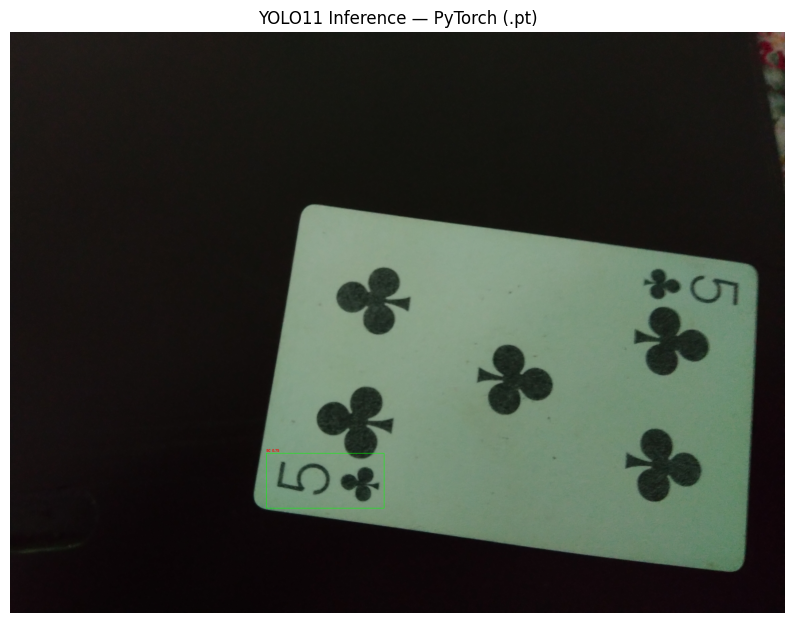

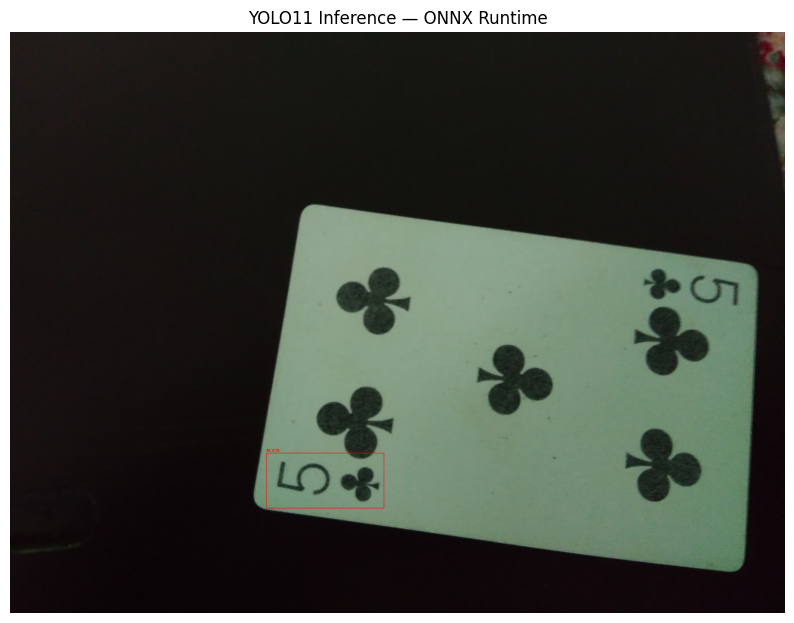

In [ ]:
from ultralytics import YOLO
import onnx
import cv2
import numpy as np
import matplotlib.pyplot as plt
import onnxruntime as ort


# Load the YOLO11 model
model = YOLO("/content/best.pt")


results_pt = model("/content/5C0.jpg")[0]
img = cv2.imread("/content/5C0.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_pt = img_rgb.copy()
for box in results_pt.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    conf = float(box.conf)
    cls = int(box.cls)
    label = f"{model.names[cls]} {conf:.2f}"
    cv2.rectangle(img_pt, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img_pt, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6,
                (255, 0, 0), 2)


plt.figure(figsize=(10, 8))
plt.imshow(img_pt)
plt.title("YOLO11 Inference — PyTorch (.pt)")
plt.axis("off")


# Export the model to ONNX format
model.export(format="onnx", dynamic=True)  # dynamic input is not supported by OpenCV. It is supported by ONNX RUNTIME by Microsoft, tho, so you cane use that to implement it with C++
#model.export(format="onnx", dynamic=False)  # OpenCV-compatible version

m = onnx.load("best.onnx")
for o in m.graph.output:
    print([d.dim_value for d in o.type.tensor_type.shape.dim])




def letterbox(img, size=640):
    h, w = img.shape[:2]
    scale = size / max(h, w)
    nh, nw = int(h * scale), int(w * scale)
    img_resized = cv2.resize(img, (nw, nh))
    canvas = np.zeros((size, size, 3), dtype=np.uint8)
    y = (size - nh) // 2
    x = (size - nw) // 2
    canvas[y:y+nh, x:x+nw] = img_resized
    return canvas, scale, x, y

img_canvas, scale, x_off, y_off = letterbox(img_rgb, size=640)
input_tensor = img_canvas.astype(np.float32) / 255.0
input_tensor = np.transpose(input_tensor, (2, 0, 1))[None, ...]

sess = ort.InferenceSession("best.onnx")
inputs = {sess.get_inputs()[0].name: input_tensor}
outputs = sess.run(None, inputs)[0]  # raw ONNX output :contentReference[oaicite:2]{index=2}

# Use Ultralytics wrapper to post-process automatically
onnx_model = YOLO("best.onnx")
results_onnx = onnx_model.predict(source=img_rgb, conf=0.25, imgsz=640)  # built‑in postprocessing :contentReference[oaicite:3]{index=3}

# Visualize ONNX results
img_on_vis = img_rgb.copy()
for box in results_onnx[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    conf = float(box.conf)
    cls = int(box.cls)
    label = f"{onnx_model.names[cls]} {conf:.2f}"
    cv2.rectangle(img_on_vis, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(img_on_vis, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

plt.figure(figsize=(10, 8))
plt.imshow(img_on_vis)
plt.title("YOLO11 Inference — ONNX Runtime")
plt.axis("off")
